In [ ]:
#End to End Machine learning project


In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')



In [3]:
df=pd.read_csv(r"C:\Users\DELL\Downloads\StudentsPerformance.csv")
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

In [5]:
df.describe()



,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:

df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [10]:
print(df["gender"].unique())
print(df["parental level of education"].unique())
print(df["race/ethnicity"].unique())

['female' 'male']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['group B' 'group C' 'group A' 'group D' 'group E']


In [11]:
numeric_feature=[feature for feature in df.columns if df[feature].dtype!="O"]
categorical_feature=[feature for feature in df.columns if df[feature].dtype=="O"]

In [12]:
print(len(numeric_feature),numeric_feature)
print(len(categorical_feature),categorical_feature)


3 ['math score', 'reading score', 'writing score']
5 ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [13]:
df["Total_score"]=df["math score"]+df["reading score"]+ df["writing score"]
df["Average"]=df["Total_score"]/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [14]:
reading_full=df[df["reading score"]==100]["Average"].count()
writing_full=df[df["writing score"]==100]["Average"].count()
math_full=df[df["math score"]==100]["Average"].count()
print(reading_full)
print(writing_full)
print(math_full)


17
14
7


In [15]:
reading_less=df[df["reading score"]<=20]["Average"].count()
writing_less=df[df["writing score"]<=20]["Average"].count()
math_less=df[df["math score"]<=20]["Average"].count()
print(reading_less)
print(writing_less)
print(math_less)


1
3
4


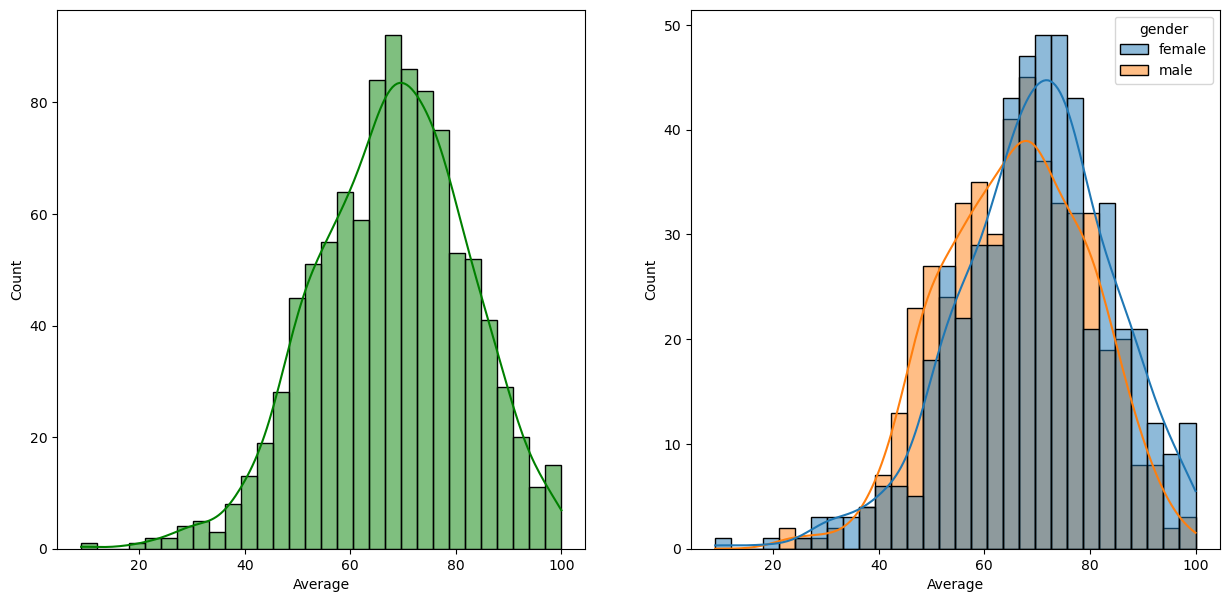

In [16]:
fig, axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x="Average",bins=30,kde=True,color="g")
plt.subplot(122)
sns.histplot(data=df,x="Average",bins=30,kde=True,hue="gender")
plt.show()


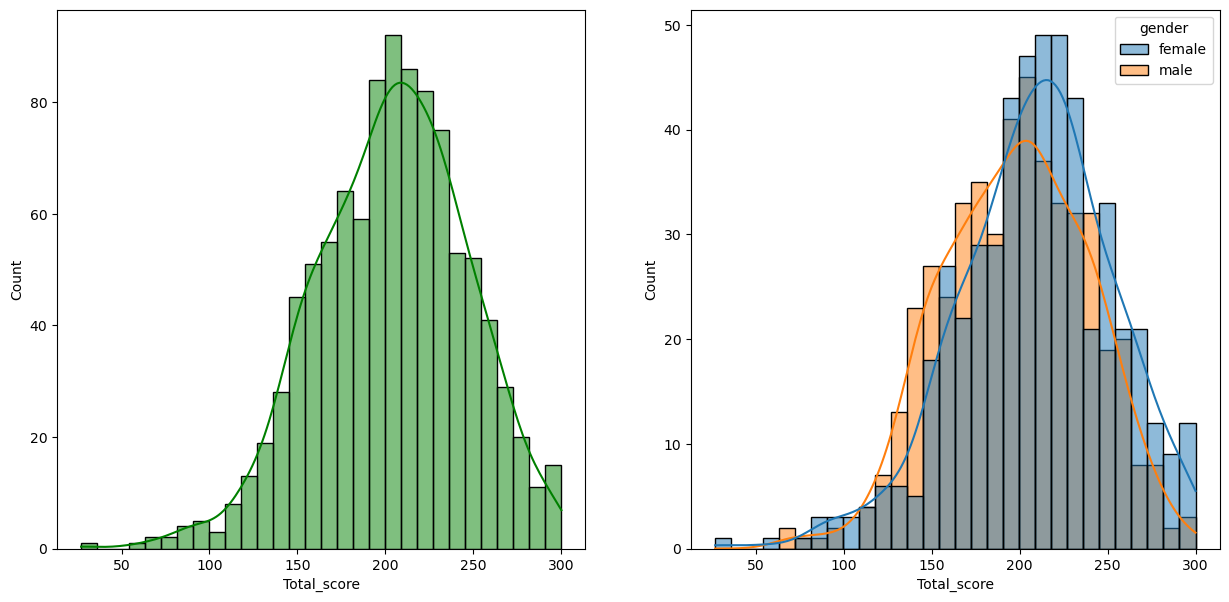

In [17]:
fig, axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x="Total_score",bins=30,kde=True,color="g")
plt.subplot(122)
sns.histplot(data=df,x="Total_score",bins=30,kde=True,hue="gender")
plt.show()


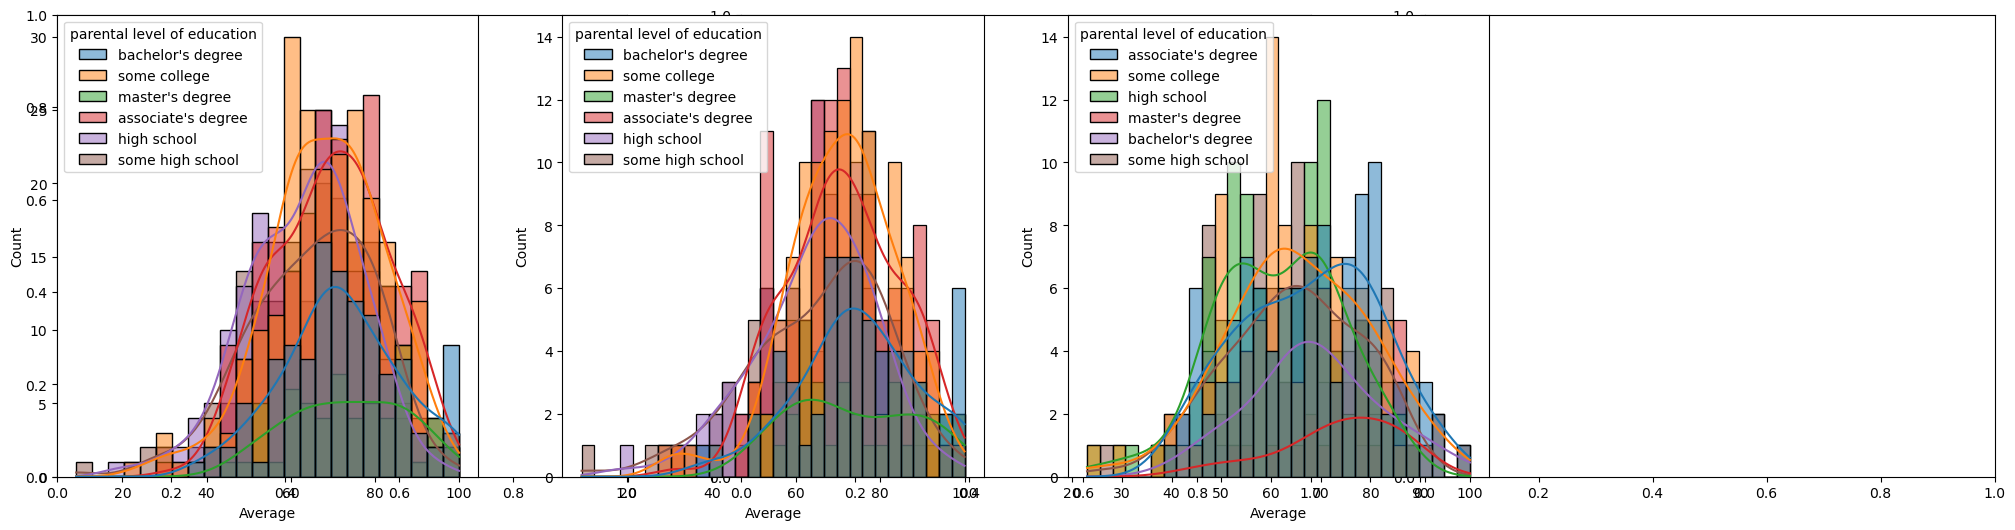

In [18]:
fig, axs = plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax=sns.histplot(data=df,x="Average",kde=True,hue="parental level of education")
plt.subplot(142)
sns.histplot(data=df[df.gender=="female"],x="Average",bins=30,kde=True,hue="parental level of education")
plt.subplot(143)
sns.histplot(data=df[df.gender=="male"],x="Average",bins=30,kde=True,hue="parental level of education")
plt.show()

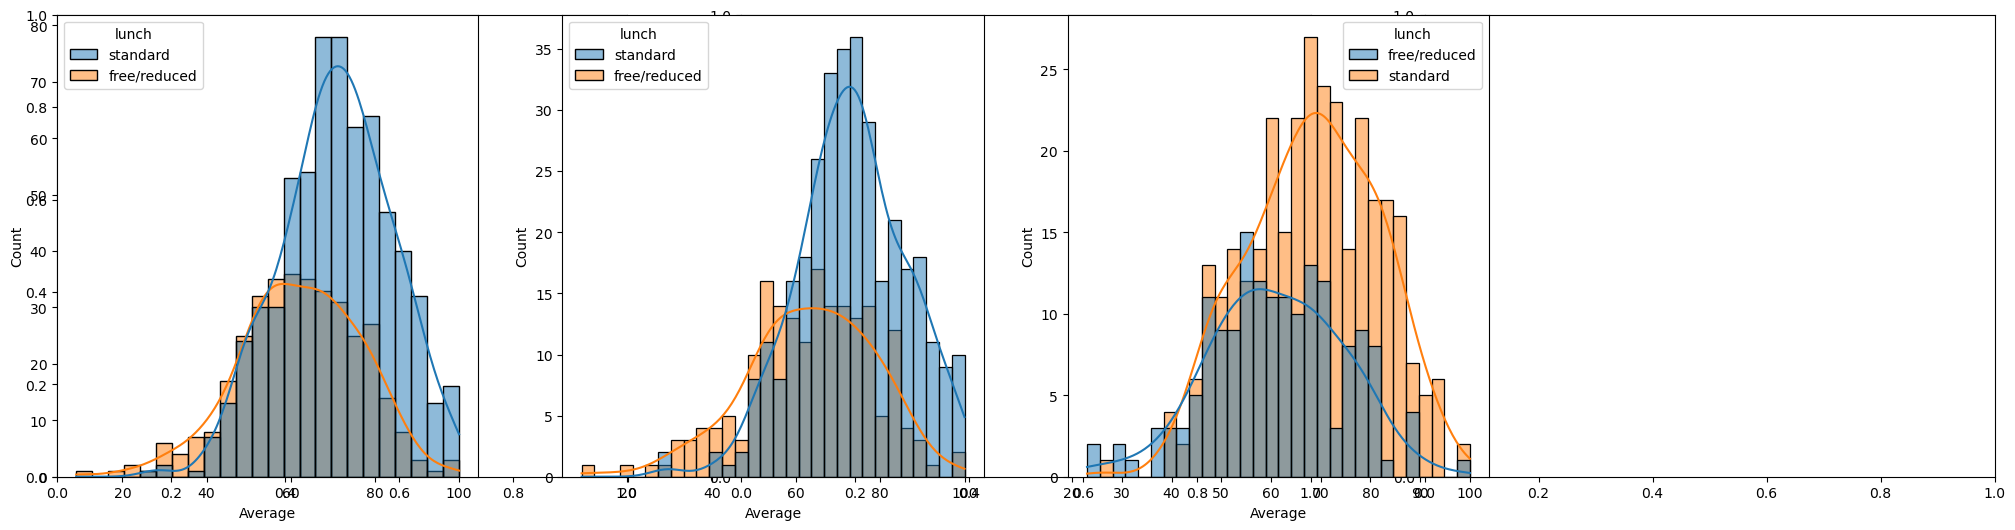

In [19]:
fig, axs = plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax=sns.histplot(data=df,x="Average",kde=True,hue="lunch")
plt.subplot(142)
sns.histplot(data=df[df.gender=="female"],x="Average",bins=30,kde=True,hue="lunch")
plt.subplot(143)
sns.histplot(data=df[df.gender=="male"],x="Average",bins=30,kde=True,hue="lunch")
plt.show()

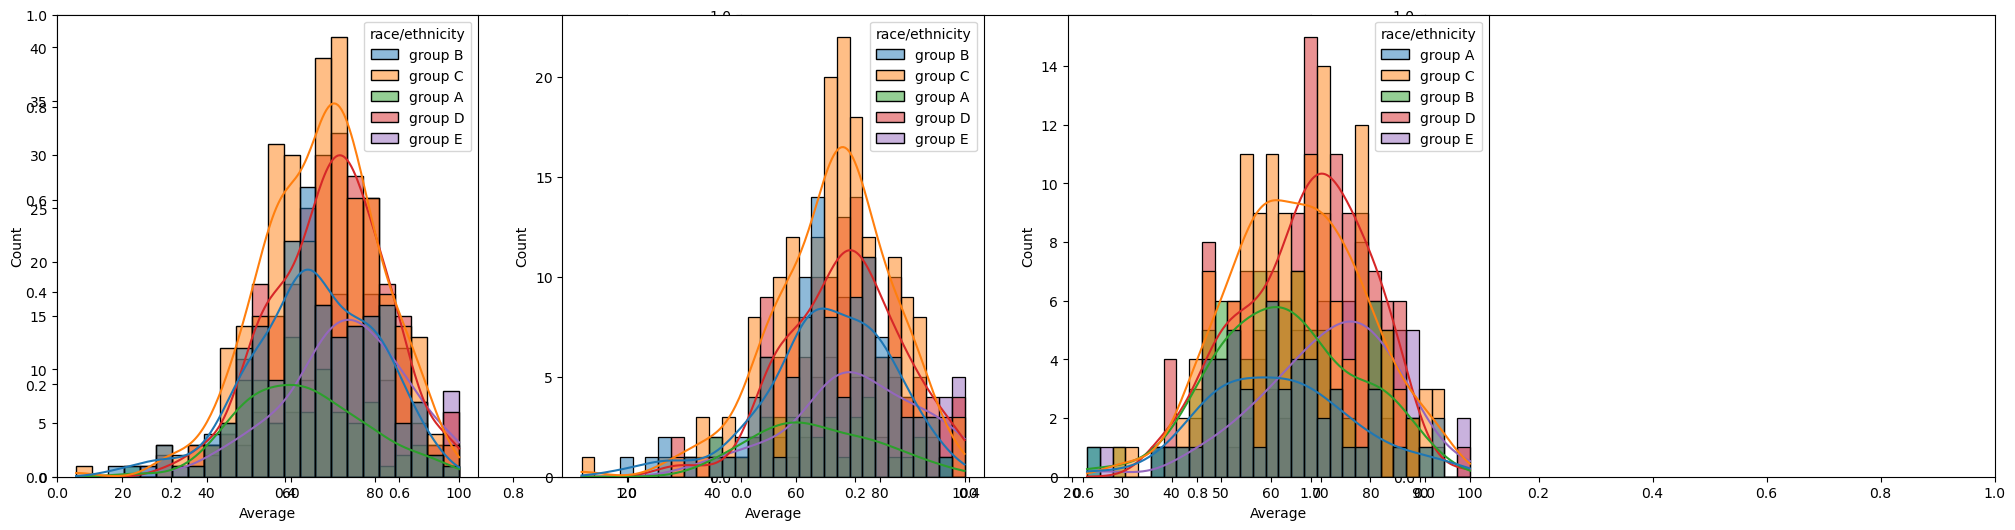

In [20]:
fig, axs = plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax=sns.histplot(data=df,x="Average",kde=True,hue="race/ethnicity")
plt.subplot(142)
sns.histplot(data=df[df.gender=="female"],x="Average",bins=30,kde=True,hue="race/ethnicity")
plt.subplot(143)
sns.histplot(data=df[df.gender=="male"],x="Average",bins=30,kde=True,hue="race/ethnicity")
plt.show()

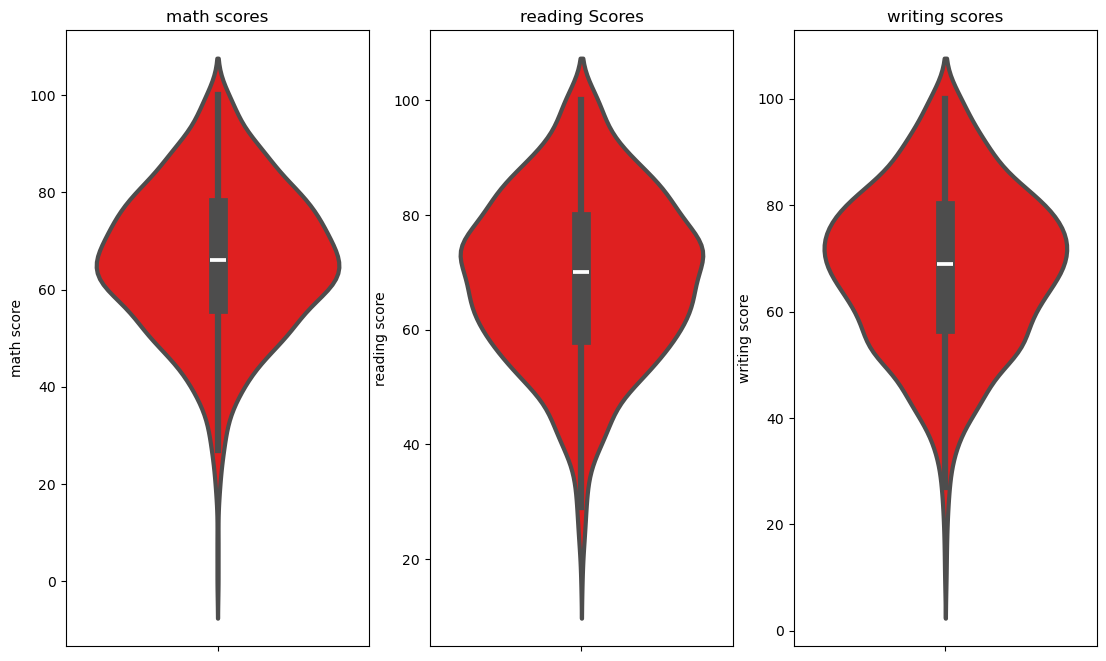

In [21]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title("math scores")
sns.violinplot(y="math score" , data=df, color="red", linewidth=3)
plt.subplot(1,4,2)
plt.title("reading Scores")
sns.violinplot(y="reading score" , data=df, color="red", linewidth=3)
plt.subplot(1,4,3)
plt.title("writing scores")
sns.violinplot(y="writing score" , data=df, color="red", linewidth=3)
plt.show()

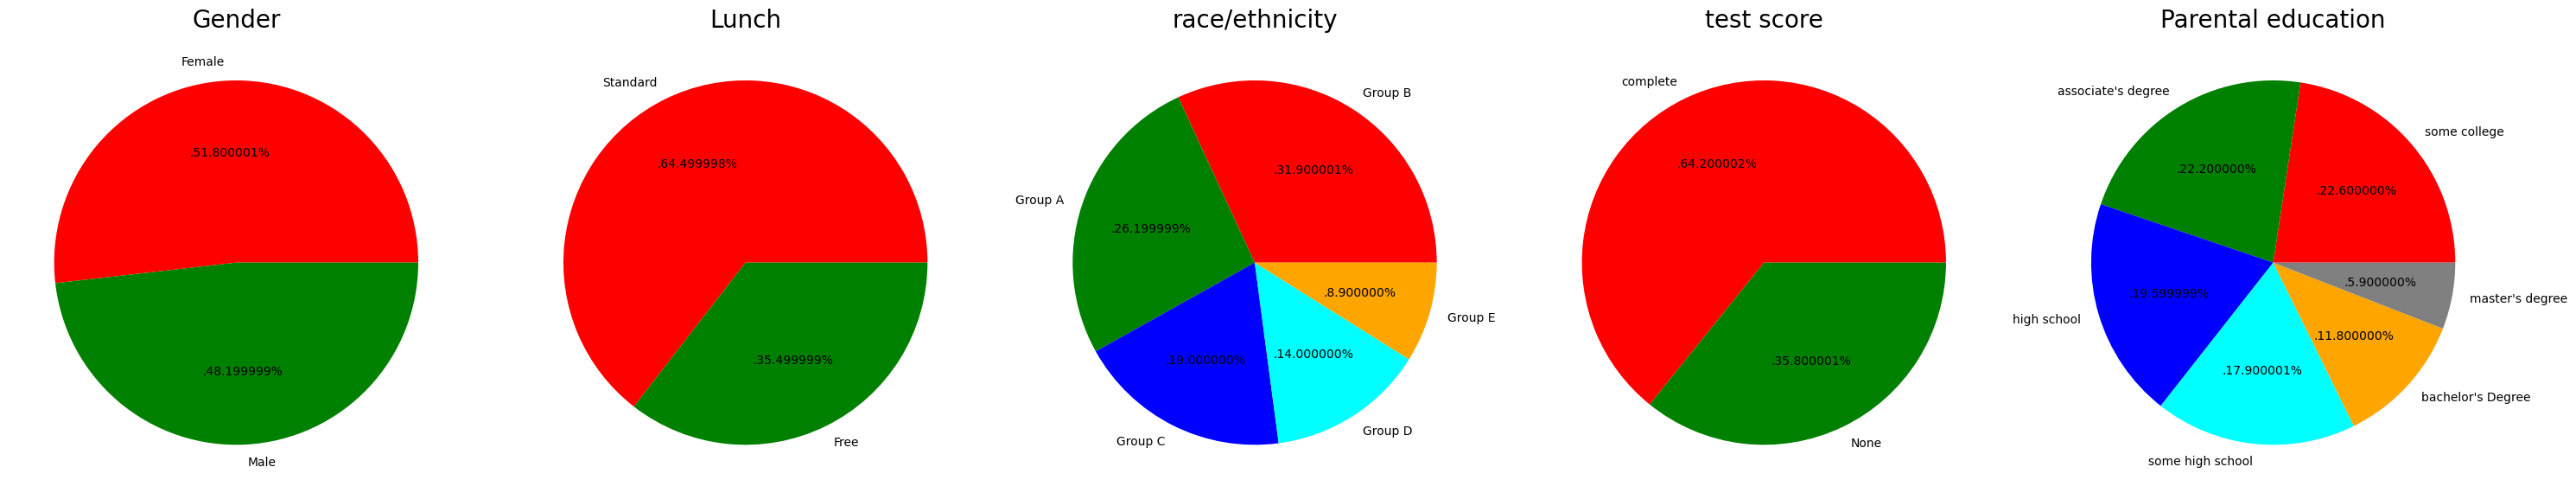

In [22]:
plt.rcParams['figure.figsize']=(30,12)
plt.subplot(1,5,1)
size=df["gender"].value_counts()
labels="Female","Male"
color=["red","green"]

plt.pie(size, colors=color, labels=labels, autopct='.%2f%%')
plt.title("Gender",fontsize=20)
plt.axis("off")

plt.subplot(1,5,2)
size=df["lunch"].value_counts()
labels="Standard","Free"
color=["red","green"]

plt.pie(size, colors=color, labels=labels, autopct='.%2f%%')
plt.title("Lunch",fontsize=20)
plt.axis("off")

plt.subplot(1,5,3)
size=df["race/ethnicity"].value_counts()
labels="Group B","Group A","Group C","Group D","Group E"
color=["red","green","blue","cyan","orange"]

plt.pie(size, colors=color, labels=labels, autopct='.%2f%%')
plt.title("race/ethnicity",fontsize=20)
plt.axis("off")

plt.subplot(1,5,4)
size=df["test preparation course"].value_counts()
labels="complete","None"
color=["red","green"]

plt.pie(size, colors=color, labels=labels, autopct='.%2f%%')
plt.title("test score",fontsize=20)
plt.axis("off")

plt.subplot(1,5,5)

size=df["parental level of education"].value_counts()
labels="some college" ,"associate's degree","high school","some high school","bachelor's Degree","master's degree"
color=["red","green","blue","cyan","orange","grey"]

plt.pie(size, colors=color, labels=labels, autopct='.%2f%%')
plt.title("Parental education",fontsize=20)
plt.axis("off")

plt.tight_layout()
plt.grid()

plt.show()

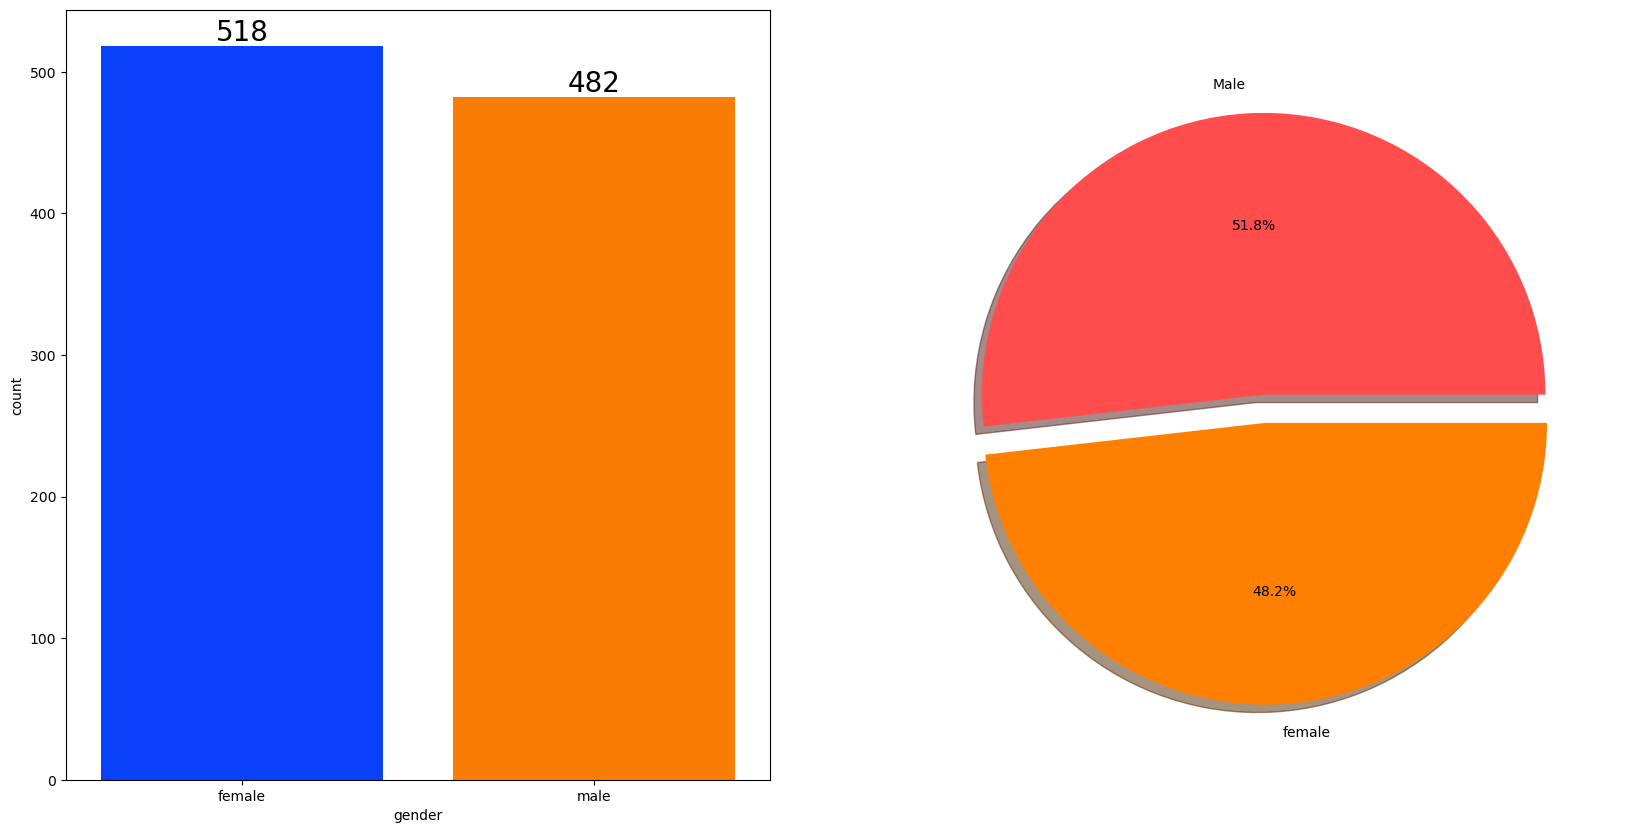

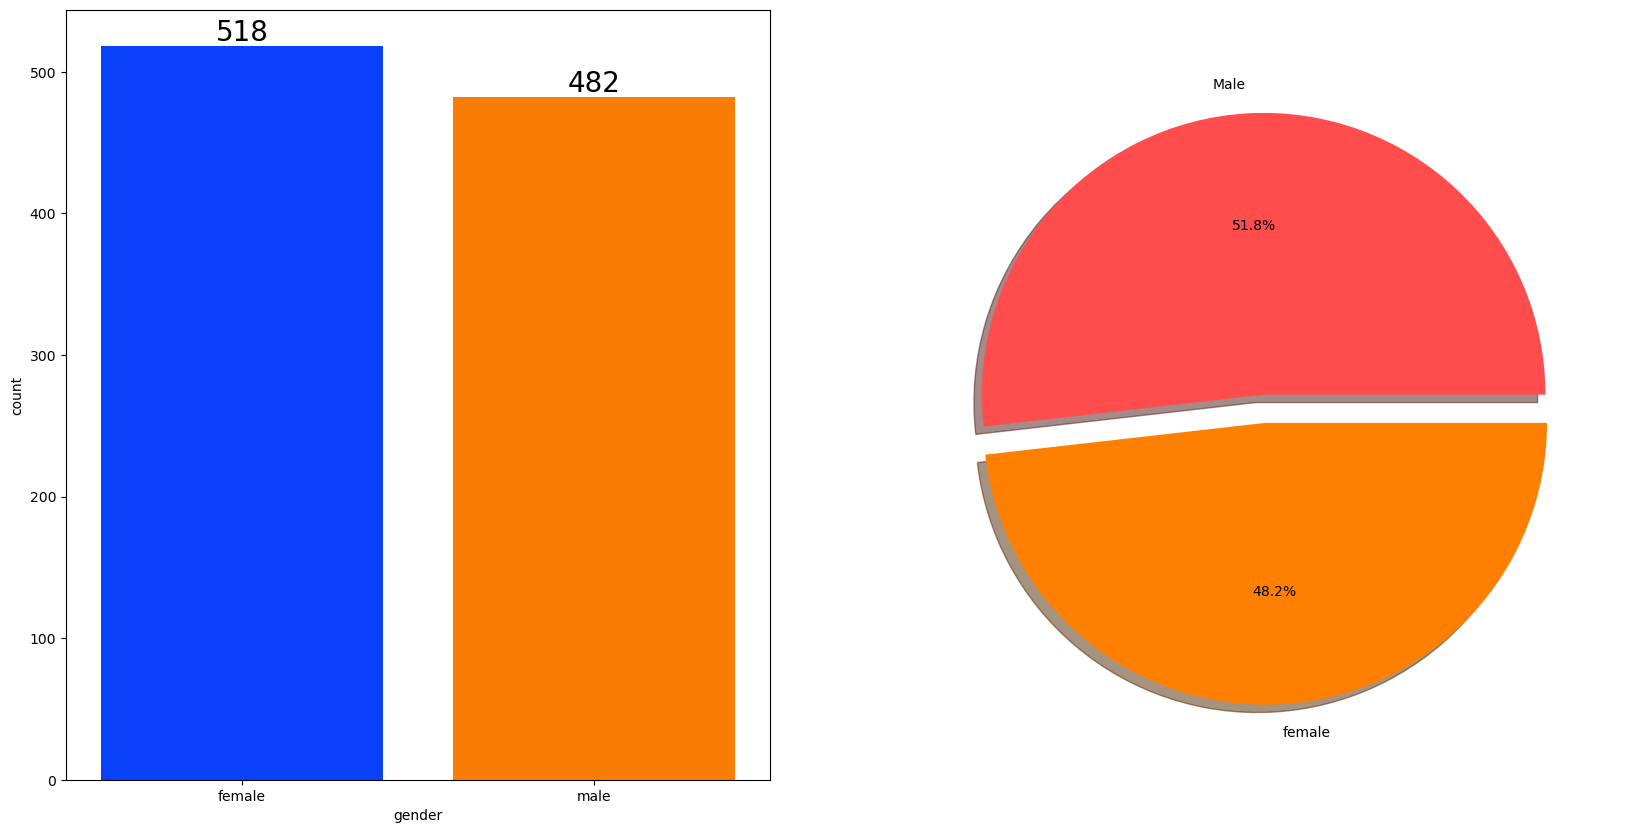

In [26]:
f, ax=plt.subplots(1,2, figsize=(20,10))
sns.countplot(x=df['gender'],data=df, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color="black",size=20)

plt.pie(x=df["gender"].value_counts(),labels=["Male","female"],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])

plt.show()

In [36]:
print(df.dtypes)

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                       int64
reading score                    int64
writing score                    int64
Total_score                      int64
Average                        float64
dtype: object


In [48]:
#if gender has any impact on student's performance
gender_group = df.groupby("gender").mean(numeric_only=True)
gender_group

,math score,reading score,writing score,Total_score,Average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


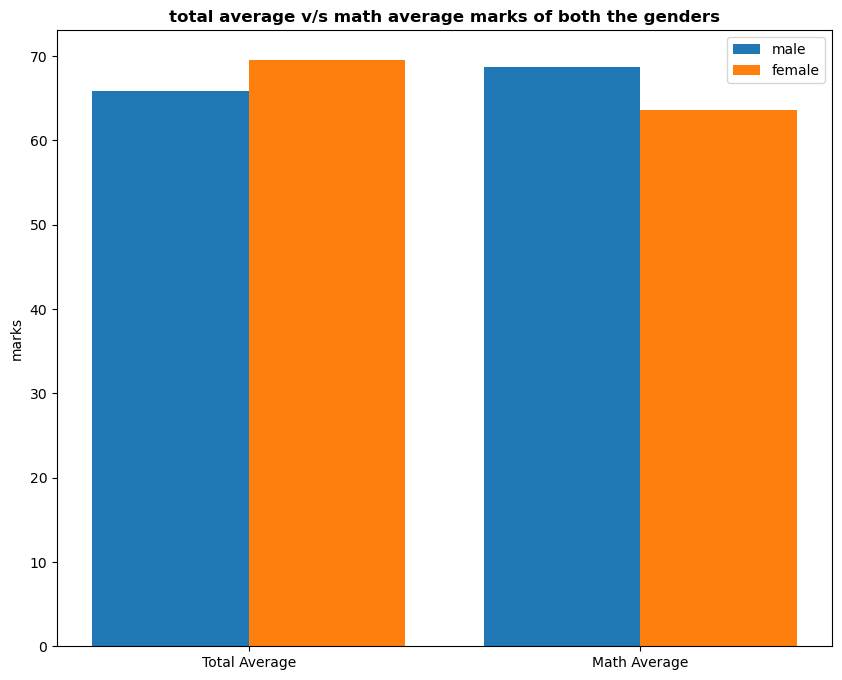

In [47]:
plt.figure(figsize=(10,8))
x=["Total Average","Math Average"]
female_scores=[gender_group['Average'][0],gender_group['math score'][0]]
male_scores=[gender_group['Average'][1],gender_group['math score'][1]]
x_axis=np.arange(len(x))
plt.bar(x_axis -0.2, male_scores, 0.4, label="male")
plt.bar(x_axis +0.2, female_scores, 0.4, label="female")
plt.xticks(x_axis,x)
plt.ylabel("marks")
plt.title("total average v/s math average marks of both the genders",fontweight="bold")
plt.legend()
plt.show()


In [49]:
groupwise_group = df.groupby("race/ethnicity").mean(numeric_only=True)
groupwise_group

,math score,reading score,writing score,Total_score,Average
race/ethnicity,,,,,
group A,61.629213,64.674157,62.674157,188.977528,62.992509
group B,63.452632,67.352632,65.600000,196.405263,65.468421
group C,64.463950,69.103448,67.827586,201.394984,67.131661
group D,67.362595,70.030534,70.145038,207.538168,69.179389
group E,73.821429,73.028571,71.407143,218.257143,72.752381


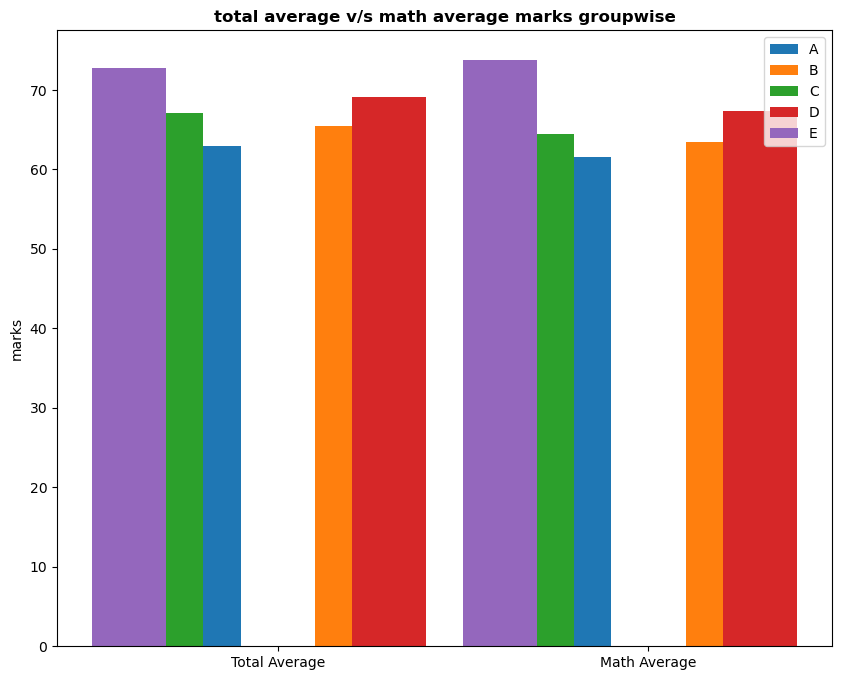

In [63]:
plt.figure(figsize=(10,8))
x=["Total Average","Math Average"]
group_A_scores=[groupwise_group['Average'][0],groupwise_group['math score'][0]]
group_B_scores=[groupwise_group['Average'][1],groupwise_group['math score'][1]]
group_C_scores=[groupwise_group['Average'][2],groupwise_group['math score'][2]]
group_D_scores=[groupwise_group['Average'][3],groupwise_group['math score'][3]]
group_E_scores=[groupwise_group['Average'][4],groupwise_group['math score'][4]]
x_axis=np.arange(len(x))
plt.bar(x_axis -0.2, group_A_scores, 0.2, label="A")
plt.bar(x_axis +0.2, group_B_scores, 0.2, label="B")
plt.bar(x_axis -0.3, group_C_scores, 0.2, label="C")
plt.bar(x_axis +0.3, group_D_scores, 0.2, label="D")
plt.bar(x_axis -0.4, group_E_scores, 0.2, label="E")
plt.xticks(x_axis,x)
plt.ylabel("marks")
plt.title("total average v/s math average marks groupwise",fontweight="bold")
plt.legend()
plt.show()

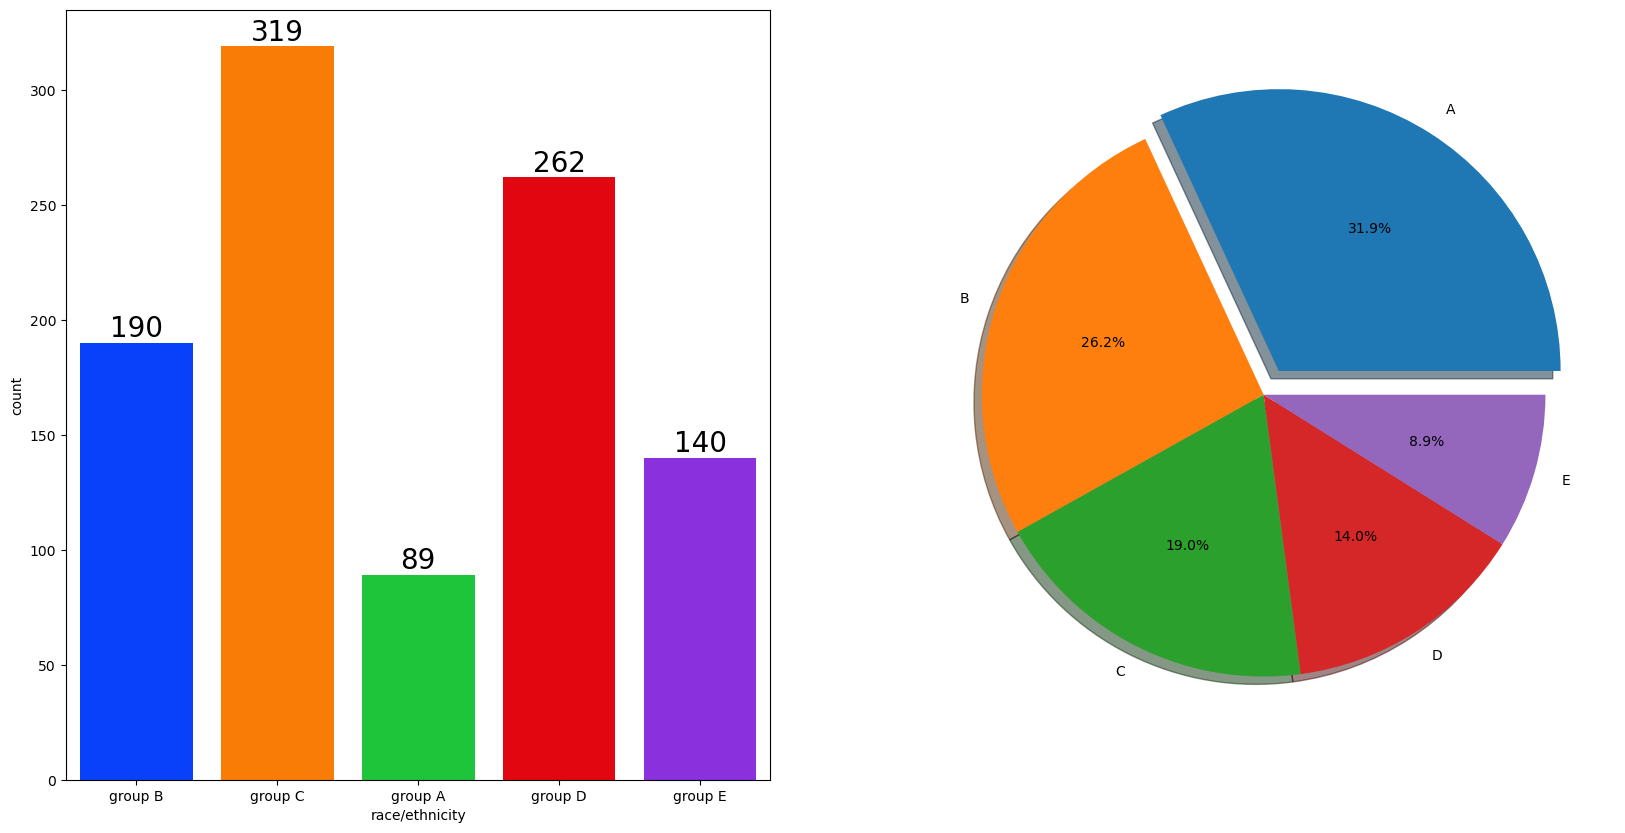

In [52]:
f, ax=plt.subplots(1,2, figsize=(20,10))
sns.countplot(x=df['race/ethnicity'],data=df, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,size=20)

plt.pie(x=df["race/ethnicity"].value_counts(),labels=["A","B","C","D","E"],explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()

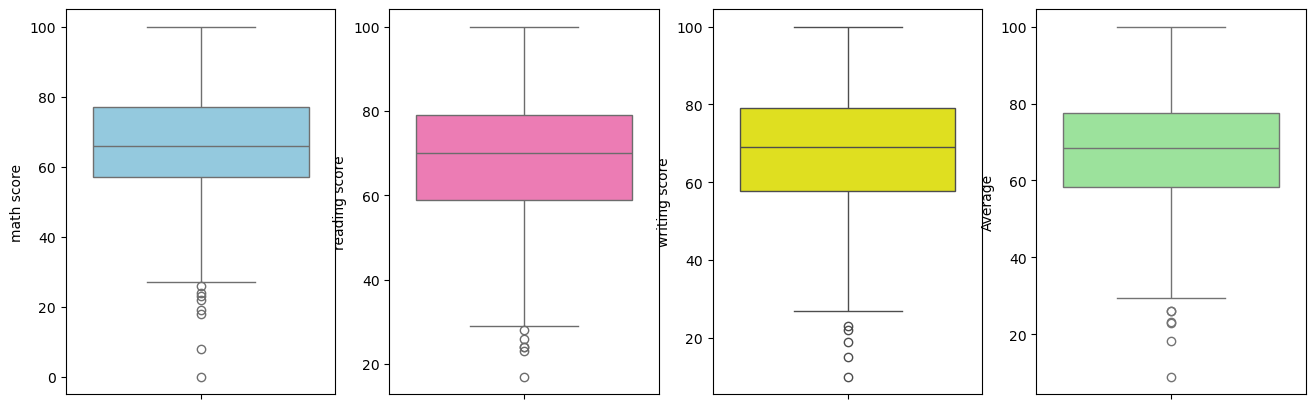

In [67]:
#Outliers checking
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color="skyblue")
plt.subplot(142)
sns.boxplot(df['reading score'],color="hotpink")
plt.subplot(143)
sns.boxplot(df['writing score'],color="yellow")
plt.subplot(144)
sns.boxplot(df['Average'],color="lightgreen")
plt.show()


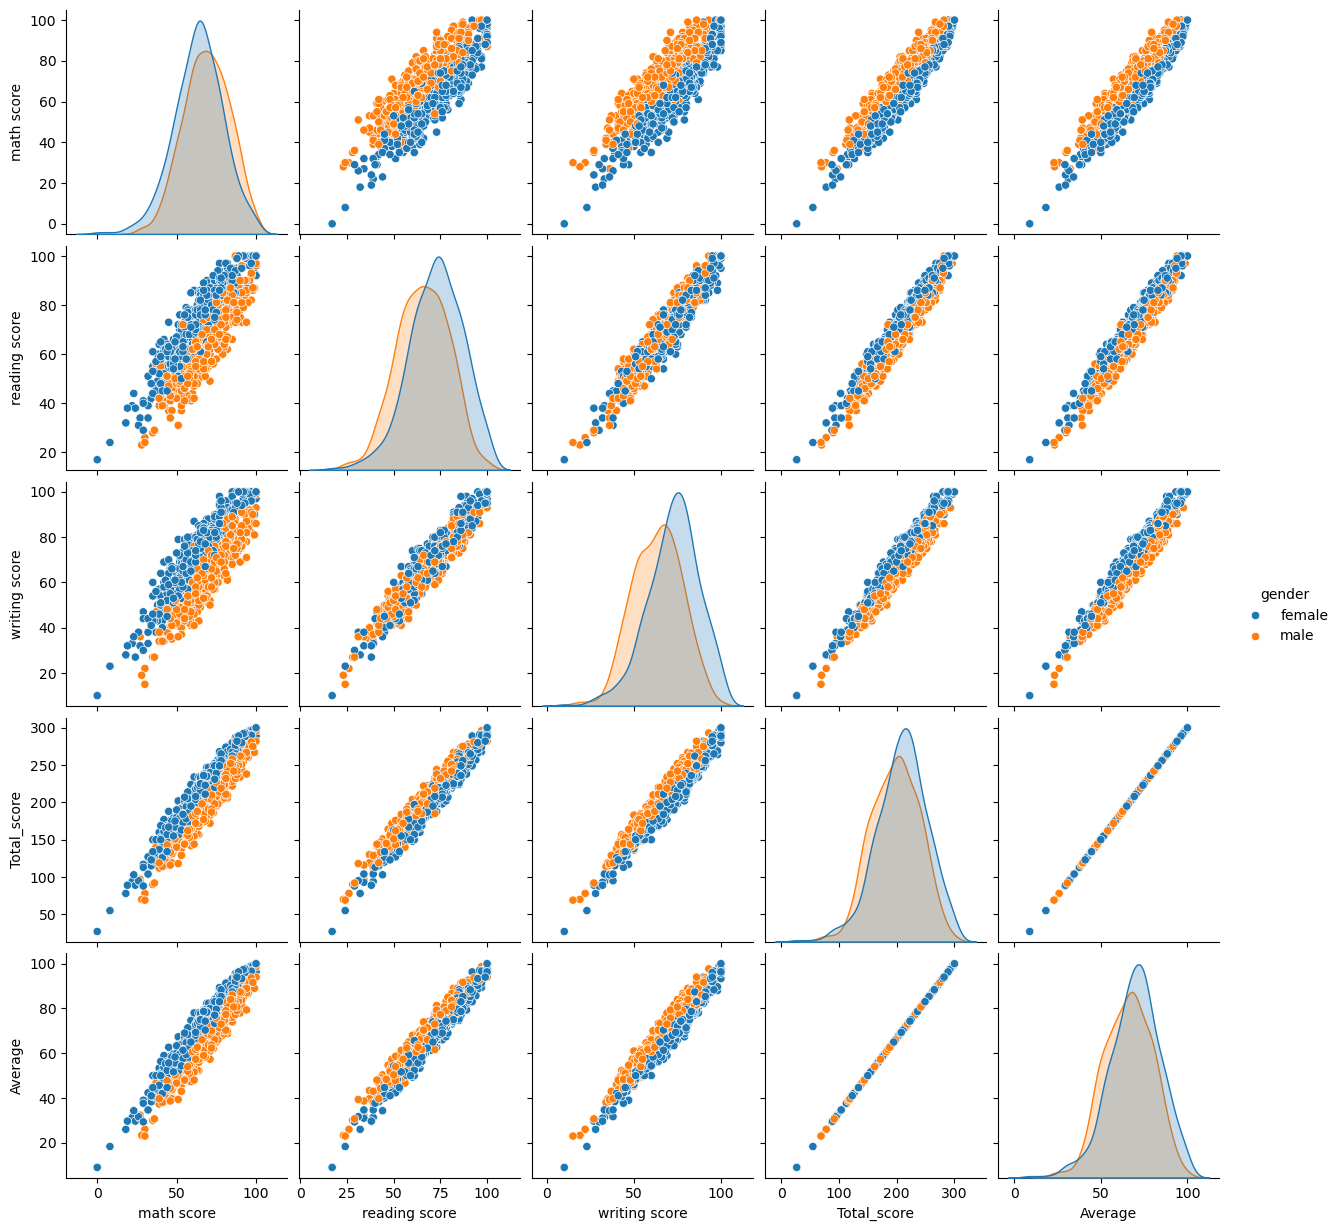

In [70]:
sns.pairplot(df,hue="gender")
plt.show()